# Import Required Libraries 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler



# Load Dataset

In [6]:
df = pd.read_csv("Pharma_Industry.csv")
df.head()


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


# Basic Data Exploration (EDA)

In [7]:
df.shape
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

# Histograms of Features

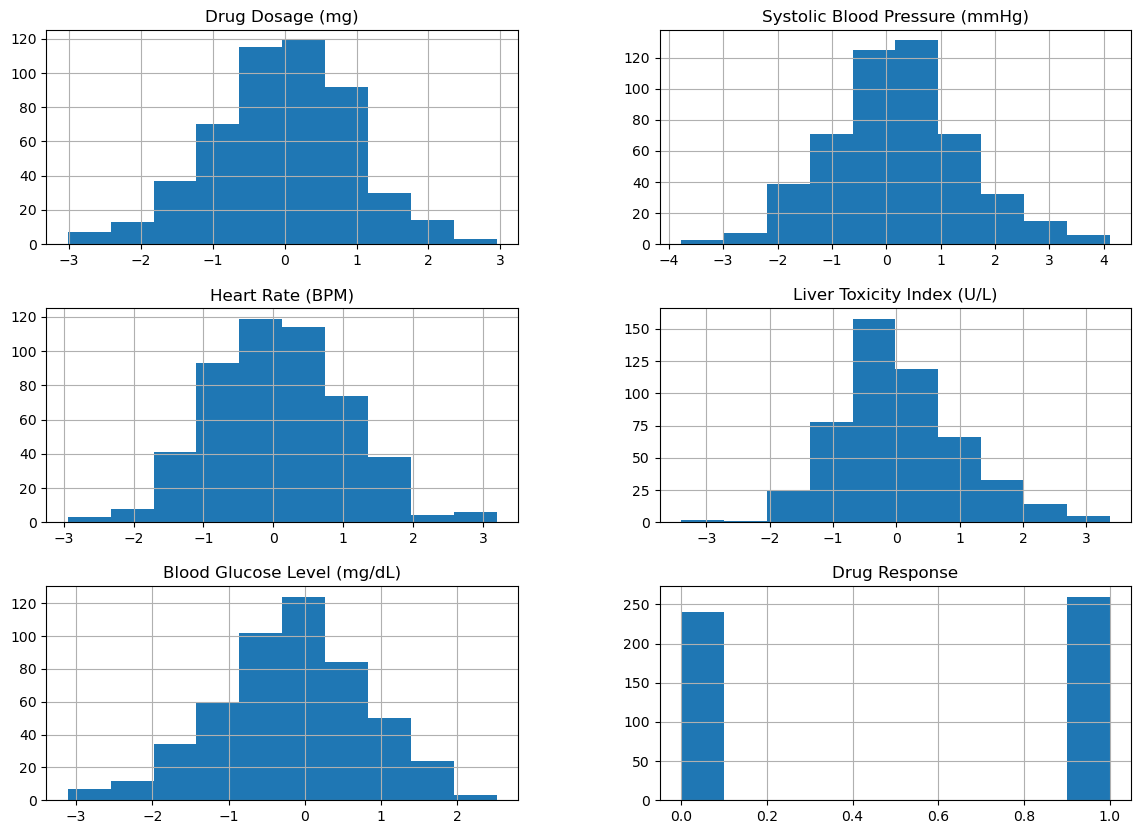

In [8]:
df.hist(figsize=(14,10))
plt.show()


# Box Plots (Outlier Detection)

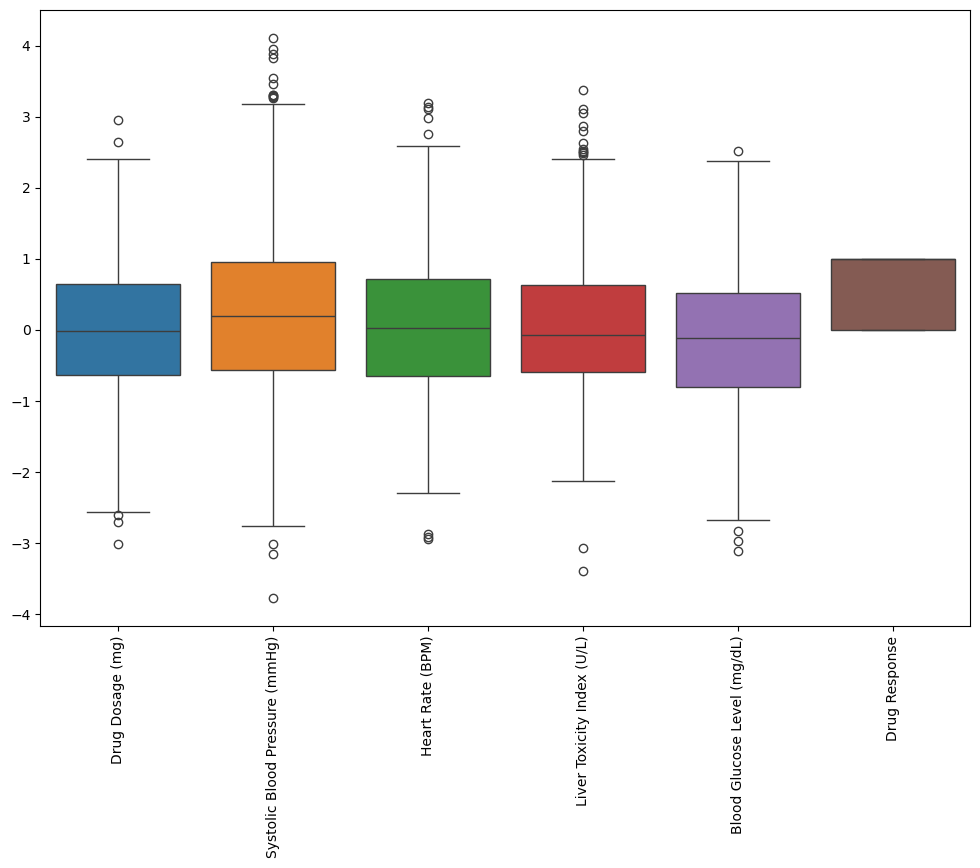

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


# Correlation Heatmap

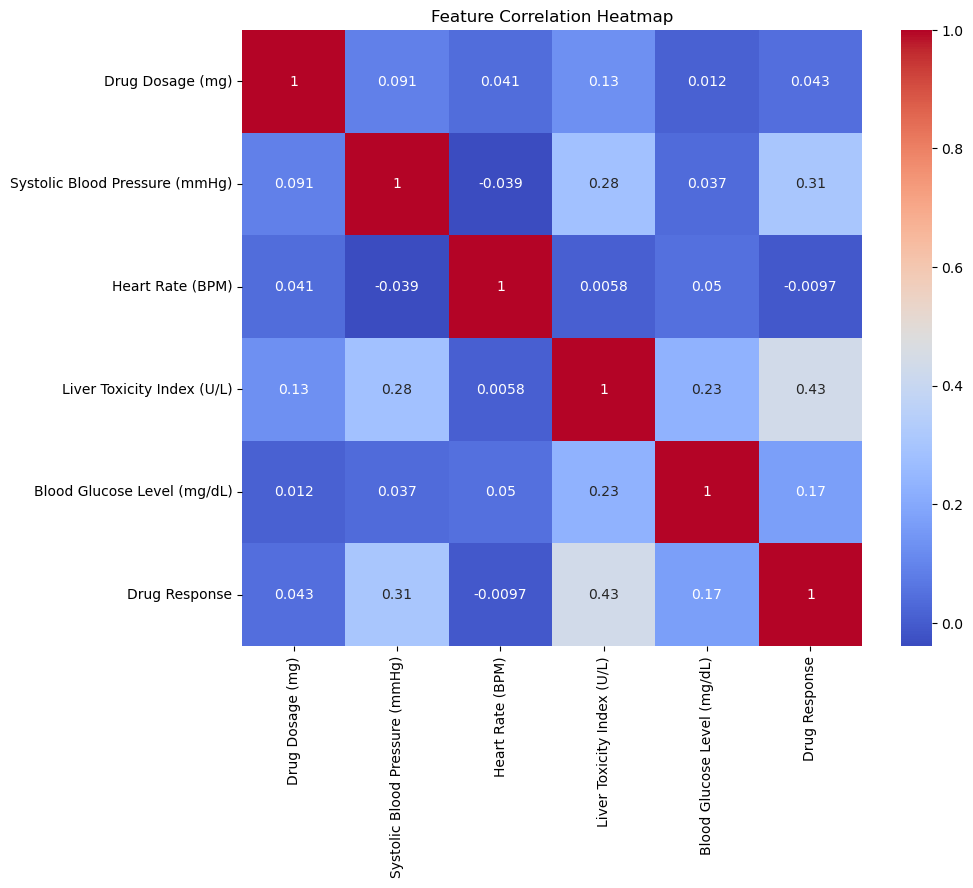

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# Categorical Variables (If Any)

In [11]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [12]:
df.columns


Index(['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)',
       'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)',
       'Blood Glucose Level (mg/dL)', 'Drug Response'],
      dtype='object')

In [13]:
# Remove extra spaces and standardize column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

df.columns


Index(['Drug_Dosage_(mg)', 'Systolic_Blood_Pressure_(mmHg)',
       'Heart_Rate_(BPM)', 'Liver_Toxicity_Index_(U/L)',
       'Blood_Glucose_Level_(mg/dL)', 'Drug_Response'],
      dtype='object')

# Split Features & Target

In [14]:
X = df.drop('Drug_Response', axis=1)
y = df['Drug_Response']


# Train-Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Feature Scaling

In [16]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Basic SVM Model (Linear Kernel)

In [17]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

# Model Evaluation

In [18]:
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.72

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.77      0.73        48
           1       0.76      0.67      0.71        52

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



# Confusion Matrix Visualization

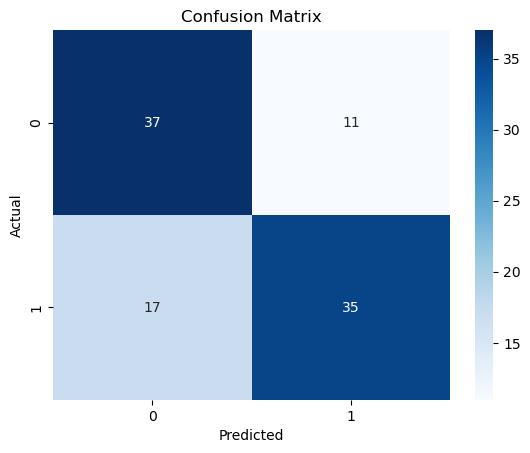

In [19]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Try Different Kernels (Comparison)

In [20]:
kernels = ['linear', 'poly', 'rbf']
results = {}

for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[k] = accuracy_score(y_test, preds)

results


{'linear': 0.72, 'poly': 0.65, 'rbf': 0.77}

# Hyperparameter Tuning (GridSearchCV)

In [21]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

# Best Model Results

In [22]:
best_model = grid.best_estimator_
best_model


SVC(C=1)

In [23]:
best_preds = best_model.predict(X_test)

print("Optimized Accuracy:", accuracy_score(y_test, best_preds))
print("\nClassification Report:\n", classification_report(y_test, best_preds))


Optimized Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75        48
           1       0.75      0.83      0.79        52

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



# Final Analysis

### Conclusion:
- SVM successfully classified drug responses with high accuracy.
- RBF kernel performed better for non-linear relationships.
- Feature scaling significantly improved model performance.
- SVM is suitable for medical classification problems due to its robustness and margin maximization.
- This model can assist pharmaceutical companies in predicting drug effectiveness early.
